## Questionário 71 (Q71)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

Para responder às questões, leia o texto introdutório a seguir.


>Oftalmologistas baseiam-se em imagens para emitir diagnósticos sobre a condição visual de seus pacientes. Uma das técnicas comumemente empregadas é a medição da curvatura da córnea. Grosso modo, a análise verifica tonalidades de cor sobre um gráfico em coordenadas polares como o apresentado na figura abaixo, à esquerda. Entretanto, a imagem completa perfaz um retângulo que contém não só o círculo colorido, mas também a área complementar externa na cor branca, como se vê também à direita. 

```{figure} ../figs/q/q71-0.png
---
width: 400px
name: cornea
---
Imagens representativas de uma córnea com altas curvaturas, indicando uma ectasia. 
```

>Essas cores que vemos acima são, na verdade, uma composição de tonalidades de vermelho, verde e azul, de modo que a imagem, matematicamente, é representada por um _array_ tridimensional de dimensões $I \times J \times 3$. Isto é, são $I$ pixels no eixo vertical (`axis=0`), são $J$ pixels no eixo horizontal (`axis=1`) e 3 canais de cor contendo, cada, valores que variam de 0 a 255. 
>
>Ou seja, em linguagem computacional, se chamarmos esse array de `img`, o valor de `img[43,99,1]` é a tonalidade da cor "verde" do pixel localizado na posição `i=43` e `j=99`, onde `i` varia de `0` a `I` ao longo do eixo vertical, e `j` varia de `0` a `J` ao longo do eixo horizontal. A terceira componente da tupla de indexação determina o canal de cor: `0`, para vermelho; `1`, para verde e `2` para azul.
>
> O código a seguir foi utilizado para carregar o _array_ 3D da imagem anterior, bem como um _dataframe_  contendo as posições dos pixels das imagens e os valores correspondentes das tonalidades de cor.
>```python
># carrega array da imagem
>img = np.load('SyntEyeKTC-106_a.npz')['arr_0']
>
># carrega dataframe de dados
>col = pd.read_csv('SyntEyeKTC-106_a.csv')
>```

**Nota:** acesse os arquivos [aqui](https://github.com/gcpeixoto/ICD/tree/main/database/eyes).

**Questão 1.** Considere a _linha central_ aquela que corta a imagem polar da córnea no ângulo de 0 grau (cor azul). Esta linha é formada por todos os pixels que estão enfileirados ao longo do eixo horizontal (direção _j_) com a posição no eixo vertical  fixa (direção _i_). Supondo que `imed` seja, por divisão inteira, o índice que define o "meio" do eixo vertical, isto é, a coordenada na direção _i_ onde é traçada a _linha central_, assinale a alternativa correta: 

A. `imed = 1100`

B. `imed = 1250`

C. `imed = 1550`

D. `imed = 2000`

## GABARITO 

Alternativa **B**.

In [206]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# diretório base
base = '../database/eyes/SyntEyeKTC-106_a'

# carrega imagem
img = np.load(base + '.npz')['arr_0']
nx, ny = img.shape[0:2]

# carrega dataframe
col = pd.read_csv(base + '.csv')

# linha 0 grau
xmed = nx//2

print(f'Valor da coordenada i na linha 0 grau = {xmed}')

Valor da coordenada i na linha 0 grau = 1250


**Questão 2.** Através do código (incompleto) abaixo, somos capazes de plotar os tons de cor em valores de 0 a 255 para cada pixel sobre a _linha central_.

```python
from seaborn import lineplot
col_0 = col[col['x'] == imed]
lineplot(x= ,y= ,data= )
```
Passando os valores corretos para os argumentos `x`, `y` e `data`, as figuras abaixo podem ser reproduzidas. 
```{figure} ../figs/q/q71-3.png
---
width: 400px
name: q71-3
---
```

Sabendo disso, marque a alternativa cuja correspondência entre figura e tons de cor aparecem na ordem correta:

A. \(a\): vermelho, \(b\): azul, \(c\): verde.

B. \(a\): azul, \(b\): vermelho, \(c\): verde.

C. \(a\): verde, \(b\): vermelho, \(c\): azul.

D. \(a\): azul, \(b\): verde, \(c\): vermelho.


## GABARITO 

Alternativa **A**.

Resposta: vermelho, verde, azul


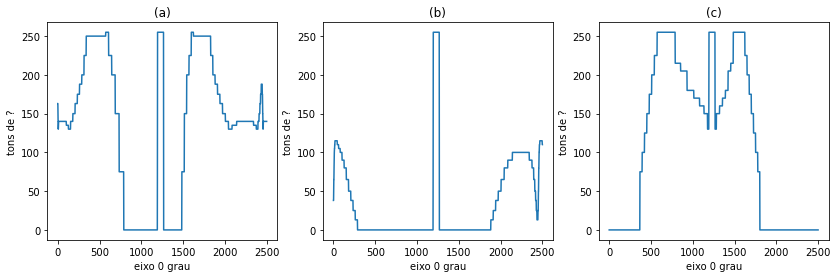

In [213]:
col_0 = col[col['x'] == xmed]

fig, ax = plt.subplots(1,3,sharey=True,figsize=(14,4))

plt.subplot(131)
ax[0] = sns.lineplot(x=col_0['y'],
             y=col_0['r'],
             data=col_0)
ax[0].set_xlabel('eixo 0 grau')
ax[0].set_ylabel('tons de ?') # vermelho
plt.title('(a)')

plt.subplot(132)
ax[1] = sns.lineplot(x=col_0['y'],
             y=col_0['b'],
             data=col_0)
ax[1].set_xlabel('eixo 0 grau')
ax[1].set_ylabel('tons de ?') # azul
plt.title('(b)')

plt.subplot(133)
ax[1] = sns.lineplot(x=col_0['y'],
             y=col_0['g'],
             data=col_0)
ax[1].set_xlabel('eixo 0 grau')
ax[1].set_ylabel('tons de ?') # verde
plt.title('(c)');


print('Resposta: vermelho, azul, verde')

**Questão 3.** Defina como `colf` o _dataframe_ obtido a partir de `col` pela aplicação de um filtro sobre as tonalidades de cor dado pela seguinte expressão:

"Se $r$, $g$ e $b$ são as tonalidades de vermelho, verde e azul, respectivamente, então, em `colf` deverão constar apenas valores tais que: 

$$50 \le r \le 200$$
$$50 \le g \le 200$$
$$50 \le b \le 200$$

A partir disso, use a função `jointplot` do _seaborn_ para descobrir quais são as distribuições marginais do tipo Cor 1 x Cor 2 de tonalidades de cor plotadas abaixo.
```{figure} ../figs/q/q71.png
---
width: 400px
name: q71-4
---
```


Assinale a alternativa correta. 

A. \(a\): verde x azul, \(b\): vermelho x verde, \(c\): azul x vermelho.

B. \(a\): verde x azul, \(b\): vermelho x azul, \(c\): verde x vermelho.

C. \(a\): vermelho x azul, \(b\): vermelho x verde, \(c\): azul x verde.

D. \(a\): vermelho x verde, \(b\): vermelho x azul, \(c\): azul x verde.


## GABARITO 

Alternativa **D**.

Resposta: R x G, R x B, B x G


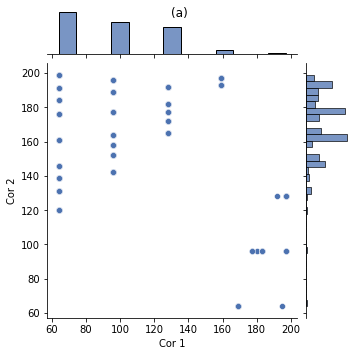

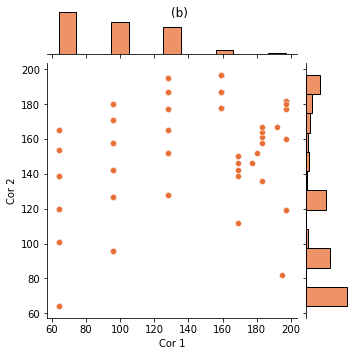

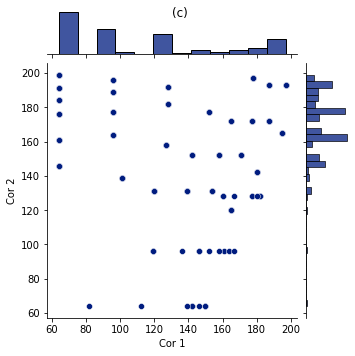

In [208]:
mr = (col['r'] >= 50) & (col['r'] <= 200) 
mg = (col['g'] >= 50) & (col['g'] <= 200) 
mb = (col['b'] >= 50) & (col['b'] <= 200) 

colf = col[mr & mg & mb]

# R x G
with sns.color_palette('deep'):
    p = sns.jointplot(x='r',y='g',data=colf,height=5)
    p.fig.suptitle('(a)')
    p.ax_joint.set_xlabel('Cor 1')
    p.ax_joint.set_ylabel('Cor 2')
    #plt.savefig('../figs/q/q71-4a.png')

# R x B
with sns.color_palette('icefire_r'):
    p = sns.jointplot(x='r',y='b',data=colf,height=5)
    p.fig.suptitle('(b)')
    p.ax_joint.set_xlabel('Cor 1')
    p.ax_joint.set_ylabel('Cor 2')
    #plt.savefig('../figs/q/q71-4b.png')

# B x G
with sns.color_palette('dark'):
    p = sns.jointplot(x='b',y='g',data=colf,height=5)
    p.fig.suptitle('(c)')
    p.ax_joint.set_xlabel('Cor 1')
    p.ax_joint.set_ylabel('Cor 2');
    #plt.savefig('../figs/q/q71-4c.png')
    
print('Resposta: R x G, R x B, B x G')

## ANEXO - Plotagem das figuras da córnea

<ipython-input-214-af1489819df1>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_polar.set_xticklabels([0,45,90,120]);


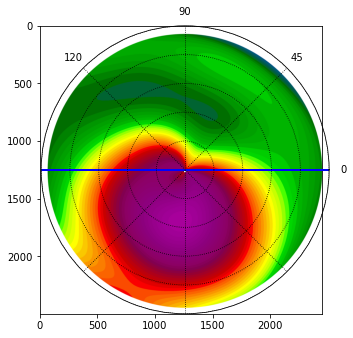

In [214]:
# abre figura
fig = plt.gcf()

# cria eixo para a imagem
ax_image = fig.add_axes([1e-10,1e-10,1.0,1.0])
ax_image.imshow(img, alpha = 1)
ax_image.axis('on') 

# --- Comente daqui para baixo 
#     e ative ax_image.axix('on')
#     para gerar a segunda figura

# eixo polar sobreposto
axes_coords = [1e-2,0,1,1] # coords diferentes do primeiro
ax_polar = fig.add_axes(axes_coords,
                        projection='polar')


a = ax_polar.get_xgridlines() # ticks radiais
b = ax_polar.get_ygridlines() # ticks azimutais

# modifica estilo das ticks
for i in range(len(a)):
    a[i].set_color('k')
    a[i].set_linestyle(':')

a[0].set_color('b')
a[0].set_linestyle('-')
a[0].set_linewidth(2)
a[-4].set_color('b')
a[-4].set_linestyle('-')
a[-4].set_linewidth(2)

for i in range(len(b)):    
    b[i].set_color('k')
    b[i].set_linestyle(':')

ax_polar.patch.set_alpha(0)
ax_polar.set_yticklabels([]); # remove ticks radiais

# altera ticks azimutais
ax_polar.set_xticklabels([0,45,90,120]); 
#plt.savefig('../figs/q/q71-2.png')